# CLM Root Depth Distributions

All soil layer information, rooting $\beta$ information, and root fraction equation are taken from the [CLM 5.0 Tech Note](https://escomp.github.io/ctsm-docs/versions/release-clm5.0/html/tech_note/index.html). 

Beta parameters:

| $\beta$ | PFTs Covered | Classification |
|---|---|---|
| 0.976 | NET temperate | Temperate needle leaf trees |
| 0.943 | NET boreal, NDT boreal, BDT boreal, $C_3$ grass, $C_4$ grass, all crops | Boreal trees, grasses, crops | 
| 0.993 | BET tropical, BDT tropical | Broad leaf tropical trees |
| 0.966 | BET temperate, BDT temperate | Broad leaf temperate trees | 
| 0.964 | BES temperate, BDS temperate | Temperate shrubs |
| 0.914 | BDS boreal, $C_3$ arctic grass | Boreal shrubs and grasses |

### 1. Load Libraries and Declare Constants

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

clm_layer_file = './clm_layers.csv'
clm_beta_file = './clm_root_betas.csv'

N_levsoi = 20

beta_r = np.array([0.976,0.943,0.993,0.966,0.964,0.914])

root_group_labels = ['Temperate needle leaf trees',
                     'Boreal trees, grasses, crops',
                     'Broad leaf tropical trees',
                     'Broad leaf temperate trees',
                     'Temperate shrubs',
                     'Boreal shrubs and grasses']


### 2. Read in Soil Layer Data

In [3]:
clm_layer_df = pd.read_csv(clm_layer_file)
clm_layer_df[0:10]

,layer,zi,deltazi,zhi
0,1,0.01,0.02,0.02
1,2,0.04,0.04,0.06
2,3,0.09,0.06,0.12
3,4,0.16,0.08,0.20
4,5,0.26,0.12,0.32
5,6,0.40,0.16,0.48
6,7,0.58,0.20,0.68
7,8,0.80,0.24,0.92
8,9,1.06,0.28,1.20
9,10,1.36,0.32,1.52


### 3. Read in Plant Functional Type $\beta$ Data

In [4]:
clm_root_beta_df = pd.read_csv(clm_beta_file)
clm_root_beta_df[0:10]

,PFT,beta_r
0,NET Temperate,0.976
1,NET Boreal,0.943
2,NDT Boreal,0.943
3,BET Tropical,0.993
4,BET temperate,0.966
5,BDT tropical,0.993
6,BDT temperate,0.966
7,BDT boreal,0.943
8,BES temperate,0.964
9,BDS temperate,0.964


### 4. Get Soil Layer Information

In [5]:
zi = clm_layer_df['zi'].values
zh = clm_layer_df['zhi'].values
deltazi = clm_layer_df['deltazi'].values

### 5. Calculate and Plot Root Fraction in Soil Layers

In [12]:
ri = np.zeros((N_levsoi,beta_r.size))

for i in np.arange(beta_r.size):
    #ri[:,i] = beta_r[i]**(np.append(0,zh[0:(N_levsoi-1)])*100.0) -  beta_r[i]**(zh[1:(N_levsoi+1)]*100.0)
    for j in np.arange(N_levsoi):
        if j==0:
            ri[j,i] = beta_r[i]**(0.0*100.0) - beta_r[i]**(zh[j]*100.0)
        else:
            ri[j,i] = beta_r[i]**(zh[j-1]*100.0) - beta_r[i]**(zh[j]*100.0)

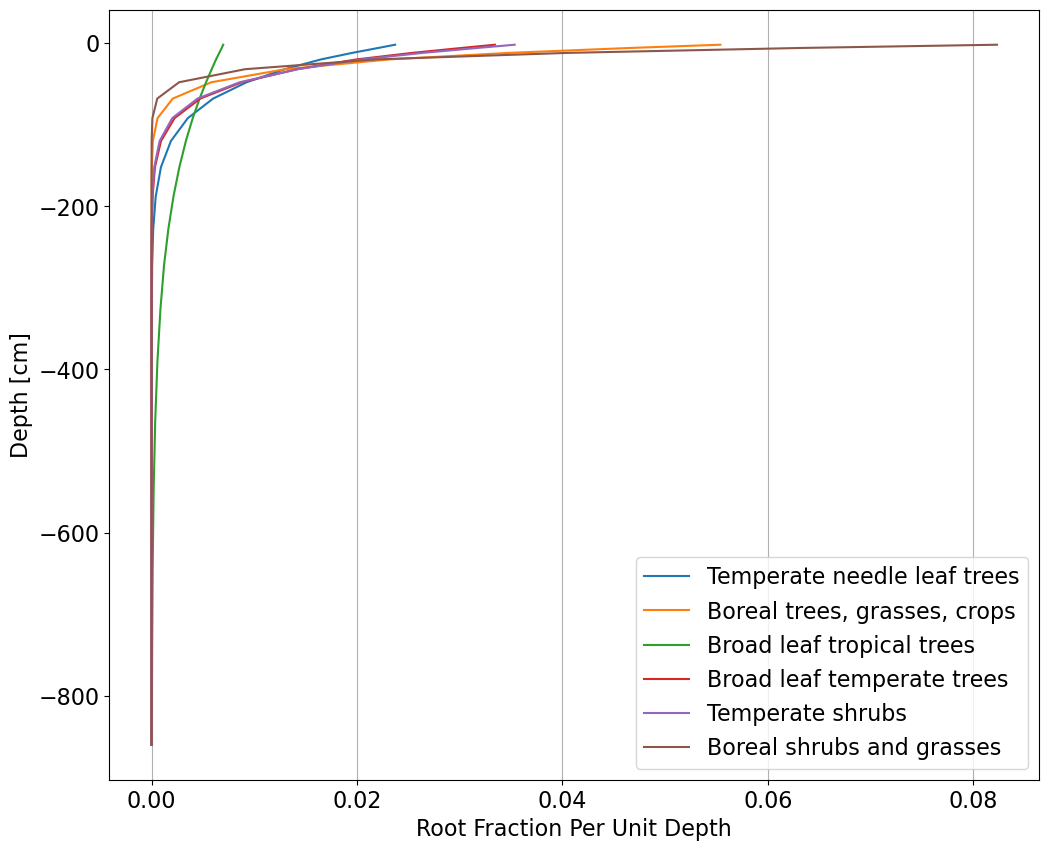

In [13]:
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 16})
for i in np.arange(beta_r.size):
    plt.plot(ri[:,i]/(deltazi[0:N_levsoi]*100),-zh[0:N_levsoi]*100,label=root_group_labels[i])
plt.xlabel('Root Fraction Per Unit Depth')
plt.ylabel('Depth [cm]')
plt.legend()
plt.grid(axis='x')


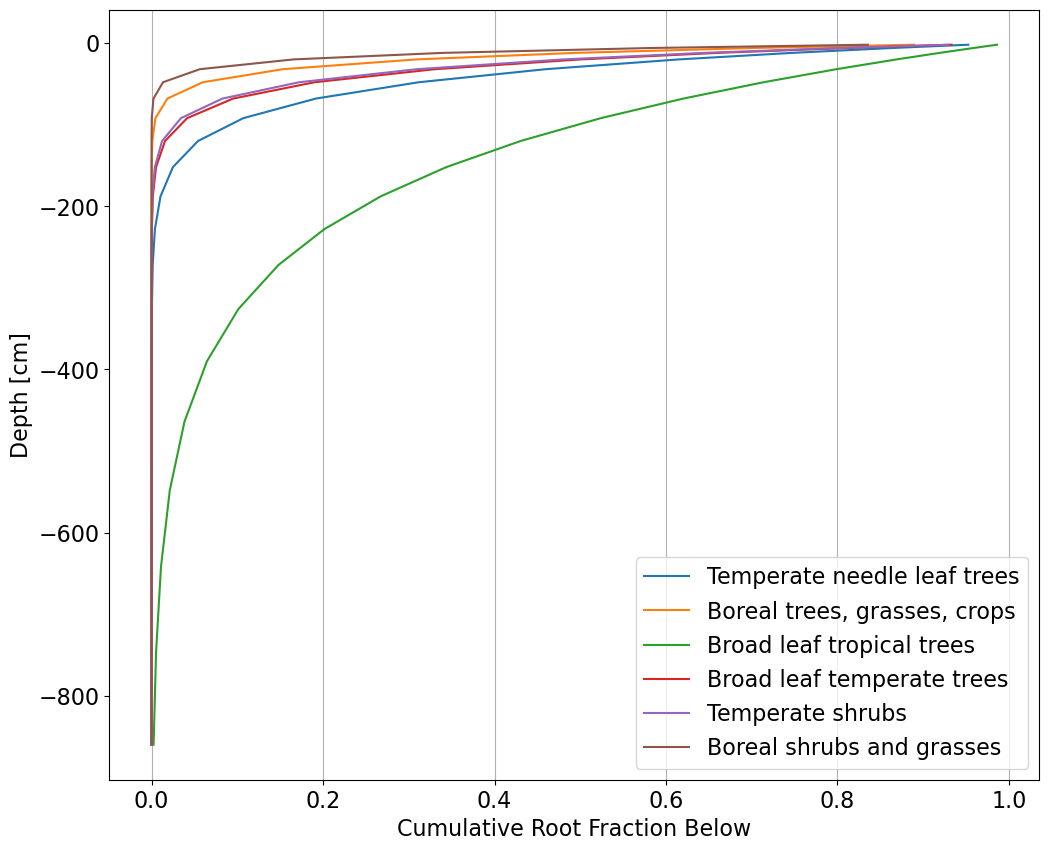

In [15]:
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 16})
for i in np.arange(beta_r.size):
    plt.plot(1.0 - np.cumsum(ri[:,i]),-zh[0:N_levsoi]*100,label=root_group_labels[i])
plt.xlabel('Cumulative Root Fraction Below')
plt.ylabel('Depth [cm]')
plt.legend()
plt.grid(axis='x')

